Intro

In [40]:
%matplotlib inline

import numpy as np
import pyautogui
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw, ImageChops

In [41]:
imageDir = 'ImageData'

In [42]:
def boxToBounds(x):
    return [x[0], x[1], x[0]+x[2], x[1]+x[3]]

def shift(box, x, y):
    return [box[0] + x, box[1] + y, box[2], box[3]]

Found Locations: 4


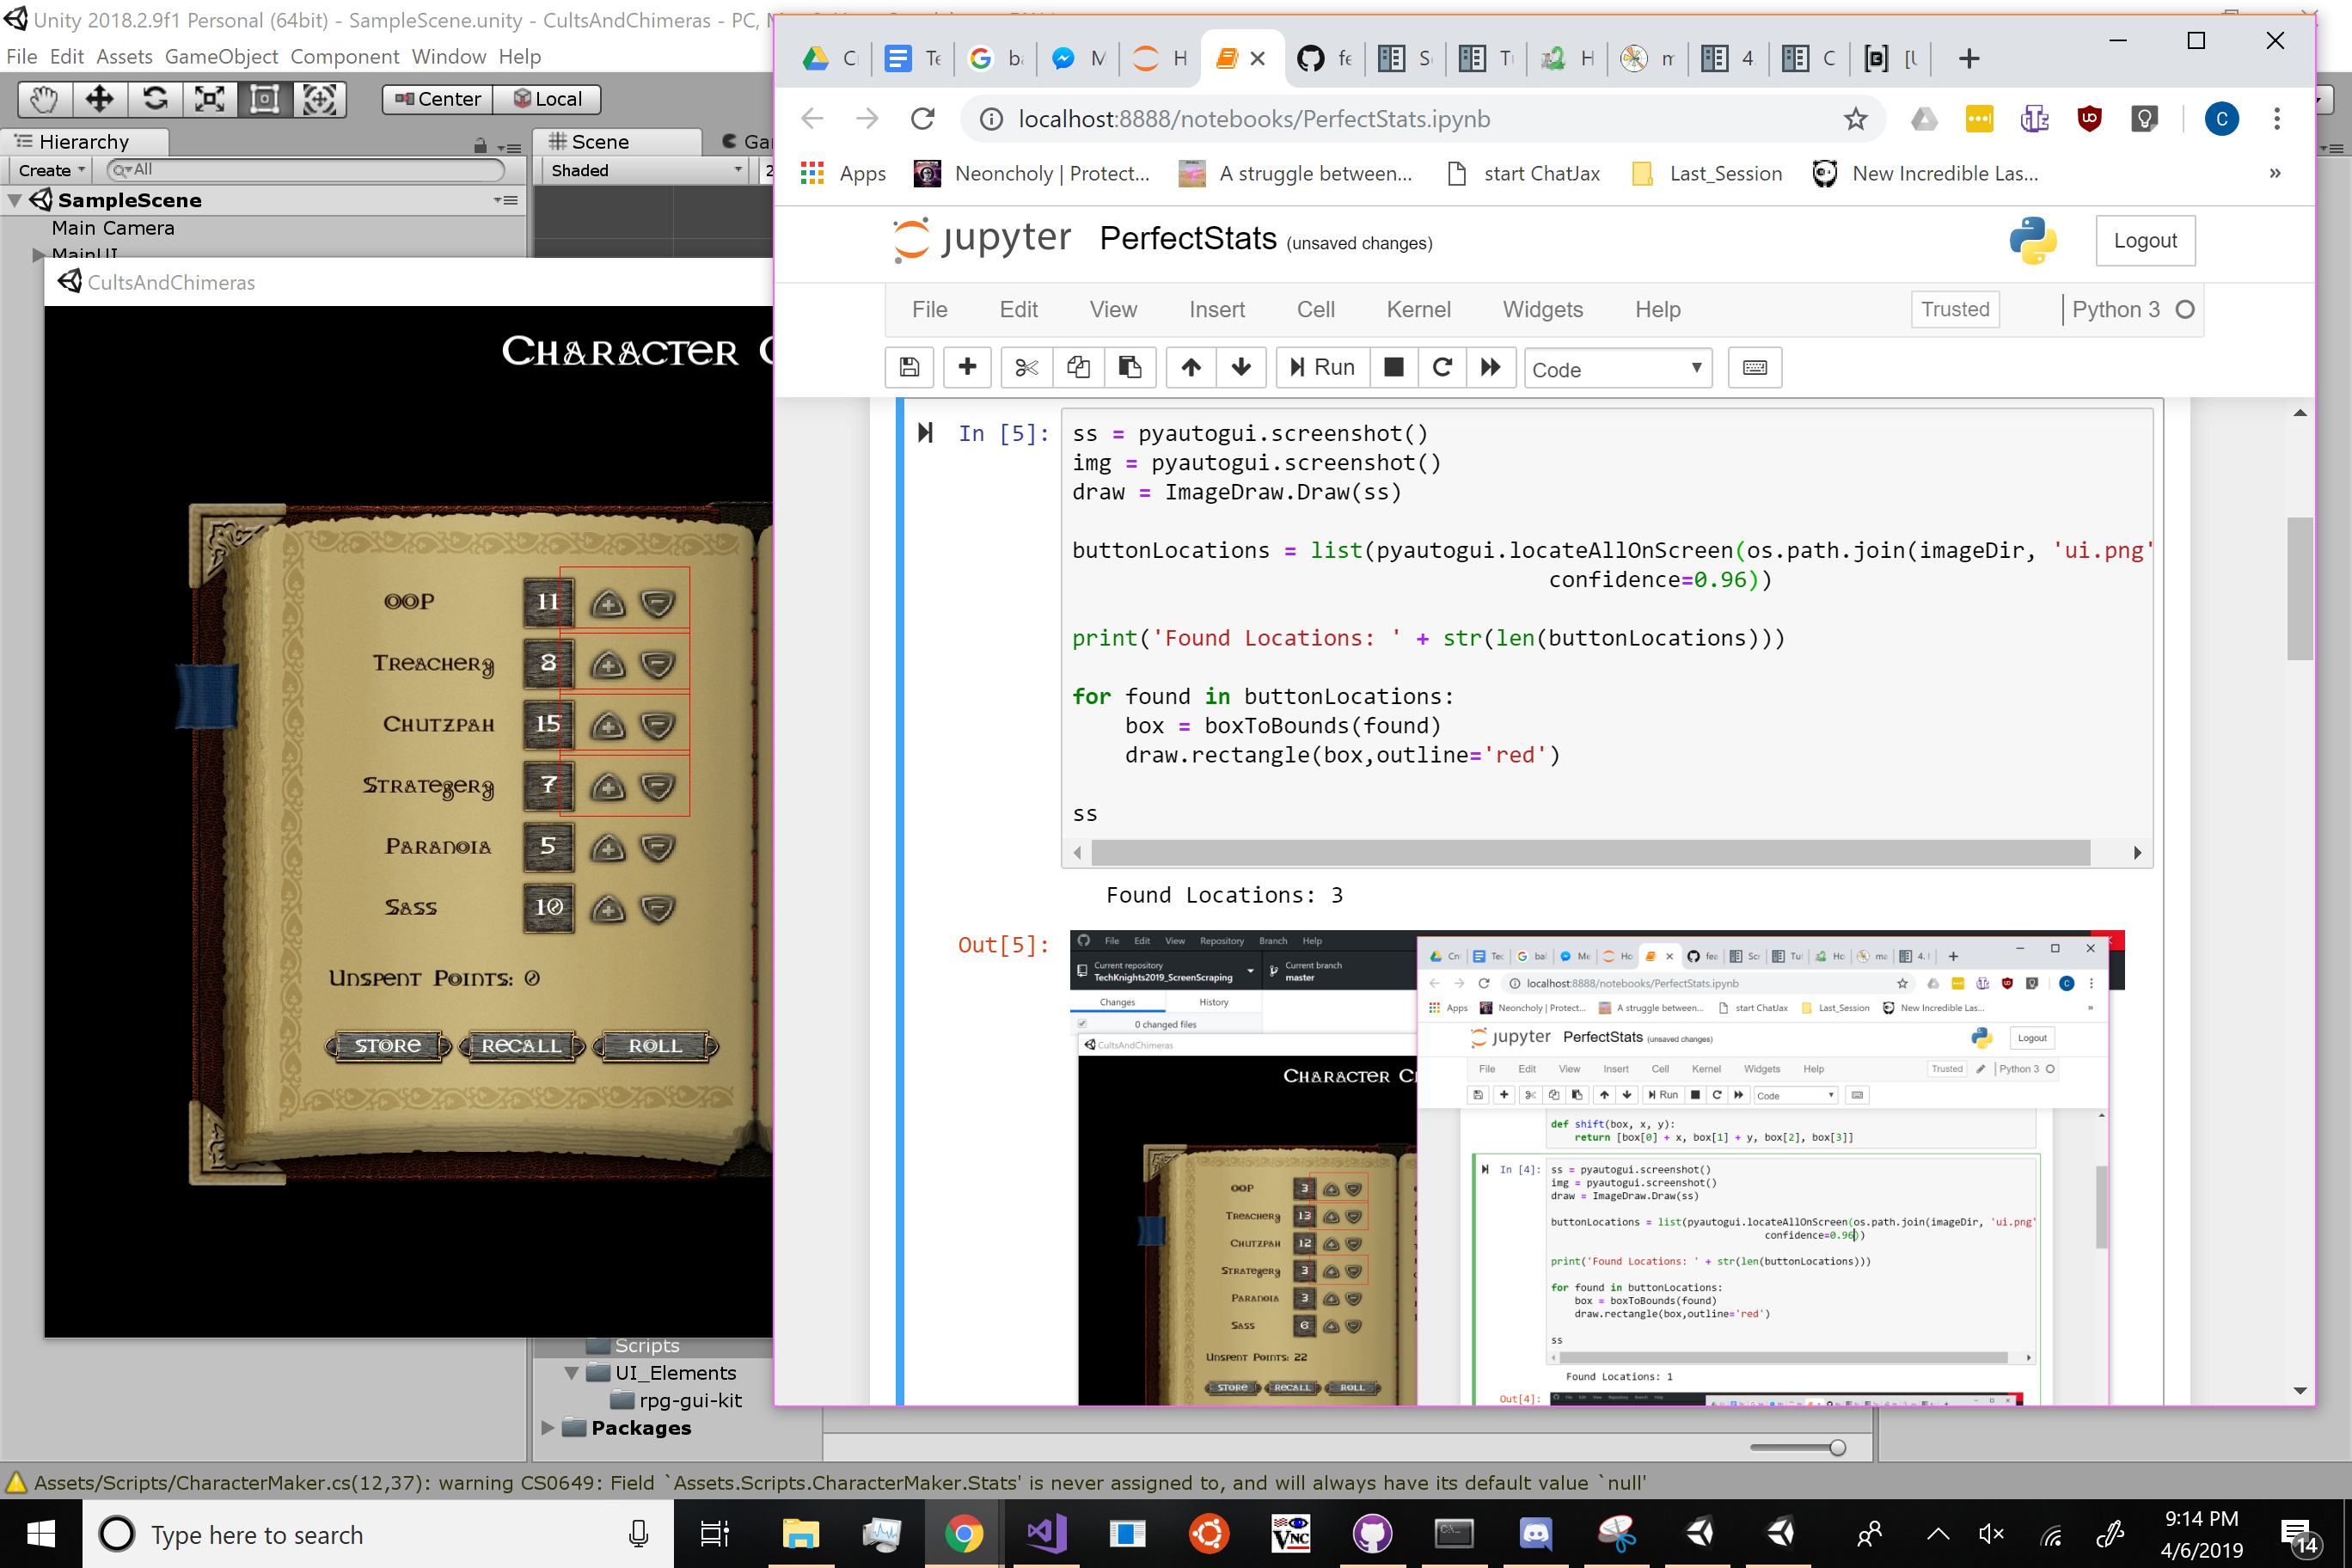

In [43]:
ss = pyautogui.screenshot()
img = pyautogui.screenshot()
draw = ImageDraw.Draw(ss)

buttonLocations = list(pyautogui.locateAllOnScreen(os.path.join(imageDir, 'ui.png'),
                                    confidence=0.96))

print('Found Locations: ' + str(len(buttonLocations)))
    
for found in buttonLocations:
    box = boxToBounds(found)
    draw.rectangle(box,outline='red')

ss

In [44]:
def saveNumber(value, box):
    ss = pyautogui.screenshot()
    region = ss.crop(boxToBounds(box))
    region.save(os.path.join(imageDir, str(value) + '.png'), 'png')
    return region

def getImage(location):
    ss = pyautogui.screenshot()
    stat = shift(buttonLocations[0], -40, 10)
    stat[2] -= 100
    stat[3] -= 15

    region = ss.crop(boxToBounds(stat))
    region.save(os.path.join(imageDir, str(value) + '.png'), 'png')
    return region

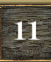

In [45]:
stat = shift(buttonLocations[0], -40, 10)
stat[2] -= 100
stat[3] -= 15

region = img.crop(boxToBounds(stat))
region

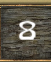

In [46]:
y_dist = buttonLocations[1][1] - buttonLocations[0][1]
stat = shift(buttonLocations[0], -40, 10 + y_dist)
stat[2] -= 100
stat[3] -= 15

region = img.crop(boxToBounds(stat))
region

In [9]:
imageDict = {}

In [15]:
upButtonLocation = pyautogui.locateCenterOnScreen(
    os.path.join(imageDir, 'UpButton.png'))
upButtonLocation

(673, 669)

In [17]:
pyautogui.click(x=upButtonLocation[0], y=upButtonLocation[1])

In [18]:
for i in range(3,19):
    value = i
    stat = shift(buttonLocations[0], -40, 10)
    stat[2] -= 100
    stat[3] -= 15
    imageDict.update({value : saveNumber(value, stat)})
    pyautogui.click(x=upButtonLocation[0], y=upButtonLocation[1])

 
11
 
8
 
15
 
7
 
5
 
10


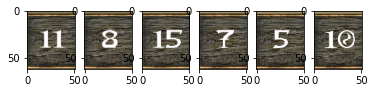

In [47]:
fig, ax = plt.subplots(ncols=6)
img = pyautogui.screenshot()

for i in range(6):
    stat = shift(buttonLocations[0], -40, 10 + y_dist*i)
    stat[2] -= 100
    stat[3] -= 15

    region = img.crop(boxToBounds(stat))
    ax[i].imshow(region)
    print(' ')
    minDist = np.inf
    bestValue = 0
    for value, image in imageDict.items():
        diff = ImageChops.difference(image, region)
        diff = np.sum(np.abs(np.array(diff)))
        if(diff < minDist):
            minDist = diff
            bestValue = value
    print(bestValue)

In [48]:
def getStats():
    img = pyautogui.screenshot()
    stats = np.zeros(6)
    for i in range(6):
        stat = shift(buttonLocations[0], -40, 10 + y_dist*i)
        stat[2] -= 100
        stat[3] -= 15
        region = img.crop(boxToBounds(stat))
        minDist = np.inf
        bestValue = 0
        for value, image in imageDict.items():
            diff = ImageChops.difference(image, region)
            diff = np.sum(np.abs(np.array(diff)))
            if(diff < minDist):
                minDist = diff
                bestValue = value
        stats[i] = bestValue
    return stats

In [49]:
storeLoc = pyautogui.locateCenterOnScreen(
    os.path.join(imageDir, 'store.png'))
rollLoc = pyautogui.locateCenterOnScreen(
    os.path.join(imageDir, 'roll.png'))

In [55]:
bestRoll = 0
pyautogui.PAUSE = 0.05
for i in range(50):
    pyautogui.click(x=rollLoc[0], y=rollLoc[1])
    stats = getStats()
    if(np.sum(stats) > bestRoll):
        bestRoll = np.sum(stats)
        pyautogui.click(x=storeLoc[0], y=storeLoc[1])
        print('New Highest: ' + str(bestRoll))

New Highest: 70.0
New Highest: 77.0
New Highest: 78.0


In [38]:
has18 = lambda x: np.sum(x == 18) > 0

In [51]:
bestRoll = 0
pyautogui.PAUSE = 0.001
for i in range(200):
    pyautogui.click(x=rollLoc[0], y=rollLoc[1])
    stats = getStats()
    if(has18(stats)):
        print(stats)


[ 9. 11. 18.  4. 10.  8.]
[ 7. 10. 11. 18. 10. 14.]
[18. 12. 14.  9. 15.  8.]
[12. 11. 11.  7.  9. 18.]
[ 9.  8. 13.  8. 18.  7.]


In [56]:
12+7+13+14+17+15



78